# Математическая магия регуляризации

Мы узнали, как применять регуляризацию для борьбы с переобучением. Но почему это работает? Как регуляризация появляется в формулах, которые мы изучили в модуле "Линейная регрессия. Часть I." Об этом поговорим прямо сейчас, подкрепив знания новыми формулами и питоновским кодом.

Мы уже умеем определять, что модель переобучилась - нужно обучать на тренировочном сете, а метрику качества считать на валидационном. Давайте  построим несколько моделей полиномиальной регрессии для разных степеней полинома, чтобы выявить "волшебную" степень, в которой недообученная модель становится переобученной

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('/Users/mikhail/Data Science Projects/Data Scientist/1. ML. Начальный уровень/03 Линейная регрессия/3_10_non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


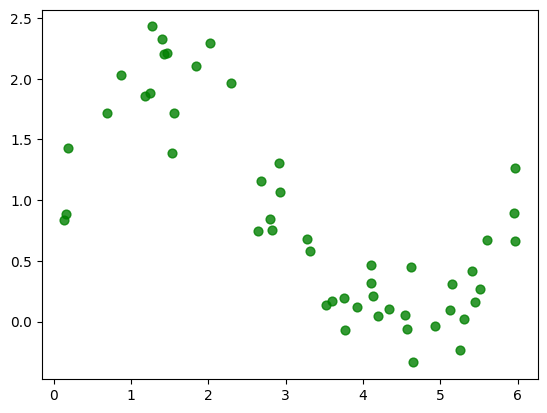

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8)
plt.show()

Обучим полиномиальную регрессию для разных степеней полинома: очень большой, очень маленькой и средней. Мы уже знаем, что для полиномиальной модели порядка $n$ в матрицу фичей $X$ добавляются степени фичей (например, в случае обучения регрессии на единственной фиче модуль приобретёт вид $y = w_0 + w_1x +w_2x^2 + \ldots + w_nx^n$) - мы изучали этот процесс подробно в уроке "Полиномиальная регрессия" модуля "Линейная регрессия. Часть I".

Скопируем из модуля "Линейная регрессия. Часть 1" функцию для тренировки полиномиальной регрессии. Кроме прочей информации будем вычислять т.н. *норму вектора* - это просто корень из суммы квадратов коэффициентов линейной регрессии. Чтобы избавиться от корня, будем вычислять квадрат нормы, обозначается как $\|w\|^2$. Вообще понятие нормы вектора будет вас преследовать в течении всего курса, так что если смутно помните, что это - посмотрите про норму вектора на Youtube и в Википедии

* https://www.youtube.com/watch?time_continue=1&v=b0dgsaYbOVI
* https://www.youtube.com/watch?time_continue=262&v=05j0DOCRnjI
* [Статья про норму вектора на википедии](https://ru.wikipedia.org/wiki/Норма_(математика))

Норма вектора обозначется двумя вертикальными линиями:
$$
\|w\|^2 = w_1^2+\ldots+w_n^2
$$

Для вычисления этой метрики используем [функцию norm из numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.norm.html). Обучать модель будем на тренировочном сете, а проверять качество модели на валидационном, как мы научились в первом уроке. Чтобы не захламлять график, я буду визуализировать только валидационный сет, а так же сами предсказания модели.

In [4]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T


In [5]:
def train_polynomial(degree,data):
    """Генерим данные, тренируем модель  
    дополнительно рисуем график
    """
    X = generate_degrees(data['x_train'],degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    print(
        "Степень полинома %d\nОшибка на валидации %.3f\nОшибка на обучении %.3f" %
        (degree, error_valid, error_train)
    )
    order_test = np.argsort(X_valid[:,0])
    plt.scatter(X_valid[:,0][order_test], y_valid[order_test], 40, 'r', 'o', alpha=0.8)
    print("Норма вектора весов \t||w|| = %.2f" % (norm(model.coef_)))
    x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    plt.plot(x_linspace, y_linspace)
    return error_valid, error_train, norm(model.coef_)

Степень полинома 12
Ошибка на валидации 0.125
Ошибка на обучении 0.051
Норма вектора весов 	||w|| = 225.51


(0.12518682096619554, 0.05112660388734073, 225.50834795987626)

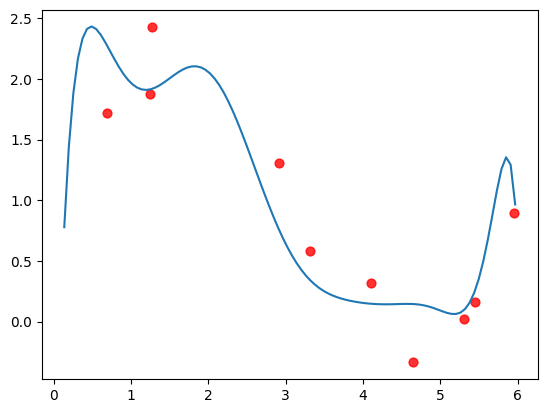

In [6]:
degree = 12
train_polynomial(degree,data)

In [7]:
degrees = []
valid_errors = []
train_errors = []
w_norm = []

Давайте проведём эксперимент чтобы узнать, как входные данные влияют на коэффициенты линейной регрессии. Третья степень *degree=3*:

Степень полинома 3
Ошибка на валидации 0.051
Ошибка на обучении 0.077
Норма вектора весов 	||w|| = 2.19


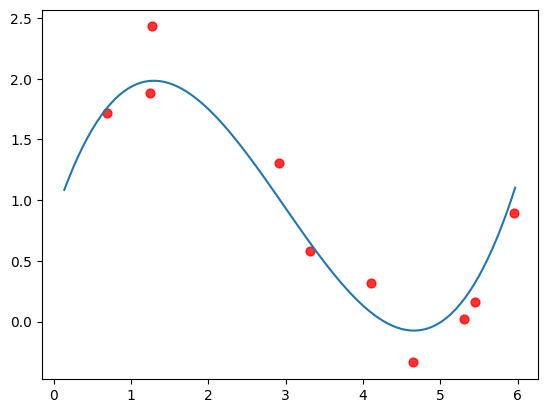

In [8]:
degree = 3

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 5
Ошибка на валидации 0.063
Ошибка на обучении 0.069
Норма вектора весов 	||w|| = 3.31


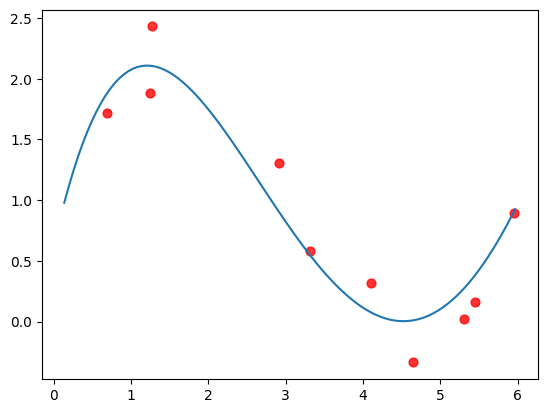

In [9]:
degree = 5

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 10
Ошибка на валидации 0.122
Ошибка на обучении 0.052
Норма вектора весов 	||w|| = 120.14


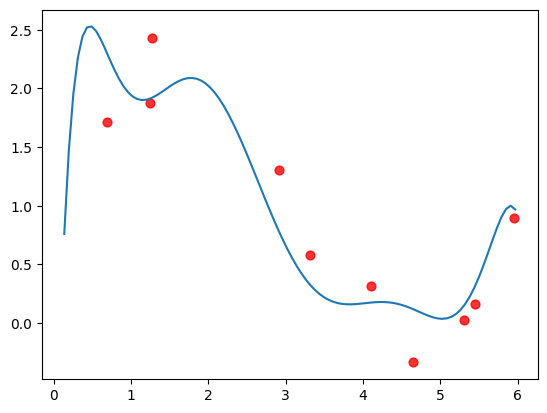

In [10]:
degree = 10

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

В этом абстрактном эксперименте: видны следующие закономерности

* степень полинома растёт $\rightarrow$ ошибка на тренировочных данных падает
* степень полинома растёт $\rightarrow$ ошибка на валидации растёт
* степень полинома растёт $\rightarrow$ сумма квадратов коэффициентов регрессии растёт

Ничего себе! Мы детектировали переобучение, о котором говорили в первом модуле. Для наглядности нарисуем график, на котором
* по оси $oX$ - степень полинома
* по оси $oY$ - ошибка на валидации и ошибка на обучении

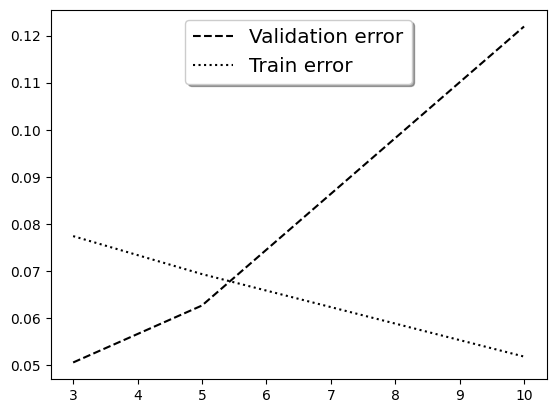

In [11]:
from matplotlib import pyplot
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(degrees, valid_errors, 'k--', label='Validation error')
ax.plot(degrees, train_errors, 'k:', label='Train error')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

На графике можно заметить, как с ростом степени полинома ошибка на валидации начинает расти, а на обучении, наоборот, падать. Одновременно с ухудшением качества модели на валидации можно заметить, как растёт норма вектора коэффициентов $w$ -  от значения $2.19$ до значения $120.14$, то есть большие по модулю величины коэффициентов свидетельствуют о том, что модель переобучается. 

В начале урока мы хотели узнать, в какой точке модель будет получается сбалансированной и не "оверфиттится". Эта точка - там, где две линии ошибок пересекаются. В этой точке, которая соответствует степени полинома *degree=5*, модель достаточно хороша на обучении и не слишком плоха на валидации.

Мы подобрались к главному вопросу этого модуля: почему случается переобучение с точки зрения математики? Вспомним, что мы получаем предсказания модели, используя коэффициенты регрессии, в виде

$$
\hat{y} = w_0x_0 + \ldots w_nx_n
$$

По этой формуле видно, что величина коэффициентов $w$ по модулю сильно влияет на предсказания - чем больше коэффициенты линейной регрессии $w=[w_1,\ldots,w_n]$, тем больше таргет $y$ при одинаковом значении $x$, зависимость линейная.

Вспомним, что аналитическая формула для нахождения коэффициентов регрессии выглядит вот так 
$$
\overline{w} = \left(X^TX\right)^{-1}X^TY
$$

Такое решение получается, когда мы минимизируем функцию ошибок ($N$ - число обучающих примеров):

$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2
$$

В эксперименте с полиномиальной регрессией мы выяснили простое правило - чем больше квадраты коэффициентов регрессии, тем хуже качество. Как же нам заставить модель делать коэффициенты поменьше, чтобы качество не страдало?

Самое простое решение, которое приходит на ум - каким-то образом "наказывать" нашу модель за слишком большие значения коэффициентов линейной регрессии $w$. Давайте добавим в функцию качества модели $L(y, w)$ дополнительное слагаемое, которое содержит квадрат нормы вектора весов $\|w\|^2$:

$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \sum_{i=1}^{k}w_i^2 = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \|w\|^2
$$

С помощью этого трюка мы минимизируем функцию $L(x,w)$ как бы в двух направлениях:
* уменьшаем ошибку $y-\hat{y}$ (первый компонент формулы)
* следим за нормой коэффициентов регрессии $\|w\|^2$ - модель вынуждена делать коэффициенты как можно меньшими, потому что их размер влияет на функцию ошибки $L(x,w)$

Эксперимент показал: чем больше $\|w\|^2$, тем сильнее переобучение. Следовательно, сделав коэффициенты более маленькими, мы уменьшим переобучение!

Такой процесс добавления слегаемых в целевую функцию называется *регуляризацией*. Регуляризация - это наложение дополнительных ограничений на целевую функцию $L(y, w)$. Добавляя в функцию качества $L$ сумму квадратов коэффициентов регрессии мы "принуждаем" нашу модель к тому, чтобы веса $w=[w_1,\ldots,w_k]$ были как можно более меньшими по модулю. Вернёмся к формуле целевой функции регуляризованной линейной регрессии:
$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \|w\|^2
$$

В этой формуле
* $\alpha$ - параметр регуляризации. Он принимает значения от $0$ до $1$: чем ближе к $1$ - тем сильнее регуляризация, тем сильнее уменьшаются веса линейной регрессии
* квадрат нормы коэффициентов линейной регрессии: $\|w\|^2 = \sum_{i=1}^{k}w_i^2$

Аналитическое решение новой функции ошибки имеет вид
$$
\overline{w} = \left(X^TX + \alpha E\right)^{-1}X^TY
$$

Обратите внимание, что формула максимально похожа на формулу для вычисления аналитических коэффициентов, с которой мы познакомились в занятии "Линейная регрессия. Часть I".
Вспомним, что аналитическая формула для нахождения коэффициентов регрессии выглядит вот так 
$$
\overline{w} = \left(X^TX\right)^{-1}X^TY
$$
Единственное отличие - внутри скобок добавилось слагаемое $\alpha E$, где E - [единичная матрица](https://ru.wikipedia.org/wiki/Единичная_матрица) размерности $k\times k$ (по количеству коэффициентов линейной регрессии) - единицы стоят только на диагонали.
$$
E = 
\left[
\begin{array}{ccccc}
1 & 0 & \ldots & 0 & 0 \\
0 & 1 & \ldots & 0 & 0 \\
\ldots& \ldots& \ldots& \ldots& \ldots \\
0 & 0 & \ldots & 1 & 0 \\
0 & 0 & \ldots & 0 & 1 \\
\end{array}
\right]
$$

Как именно получилась такая формула - выходит за пределы данного курса. В этом уроке главное понять - регуляризация это не магия, это математика и формулы. Чтобы запрограммировать формулу не обязательно понимать, как она получилась - главное проверить, что она работает. В прошлом уроке мы научились программировать формулу без регуляризации, а в этот раз я предлагаю вам самостоятельно запрограммировать формулу с регуляризацией в рамках домашней работы

**Задание среднего уровня** Мы использовали реализацию Ridge регрессии из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=8*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.

In [22]:
data = pd.read_csv('/Users/mikhail/Data Science Projects/Data Scientist/1. ML. Начальный уровень/03/3_10_non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [23]:
degree = 8
X = generate_degrees(data['x_train'],degree)
X.shape

(50, 8)

In [25]:
y = data.y_train.values
y.shape

(50,)

In [28]:
lambda_ = 0.8
E = np.eye(degree)
skob = X.T @ X + lambda_ * E
XTy = X.T @y

w = np.linalg.inv(skob) @ XTy


In [27]:
E

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [29]:
w

array([ 1.51945532e+00,  5.15154349e-01, -1.63106314e-01, -3.85994710e-01,
        1.97020497e-01, -3.50333018e-02,  2.36527305e-03, -3.01951078e-05])

Мы рассмотрели случай, когда в целевую функцию $L(y,w)$ добавляются квадраты коэффициентов регрессии. Такая модифицикация целевой функции называется $L2$ регуляризацией. 

Следует отметить, что существует также $L1$ регуляризация, когда в целевую функцию $L(y,w)$ добавляются не квадраты весов, а модули весов - этот приём соответствуе метрике *MAE*, с которой вы познакомились в прошлом уроке.

$$
L1(w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \sum_{i=1}^{k}|w_i|
$$

$L1$ обладает интересным эффектом - коэффициенты у фичей, которые мало влияют на целевую переменную, становятся равными нулю - то есть такая регуляризация позволяет производить отбор фичей - "выкидываем" из модели фичи, при которых обнулились коэффициенты. В библиотеке sklearn линейная модель с L1-регуляризацией реализована в `sklearn.linear_model.Lasso`

Как выбрать между двумя типами регуляризации?
* если фичей очень много (сотни), среди которых есть потенциально не важные - выбирай *L1*
* фичей мало и все они важны - выбирай *L2* 

Мы познакомимся с регуляризацией $L2$ - такую регуляризацию называют *гребневой*, а реализацию этой модели возьмём из `sklearn.linear_model.Ridge`. Натренируем две модели - одну с коэффициентом регуляризации $\alpha=0.01$, а вторую - без регуляризации $\alpha=0.0$:

In [12]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=0.01)
model_linear = Ridge(alpha=0.0)
degree = 10

In [13]:
X = generate_degrees(data['x_train'], degree)
y = data['y_train']
# обучаем линейную регрессию с  регуляризацией
model_ridge.fit(X, y)
model_linear.fit(X, y)

/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=5.48978e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.2478e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,alpha,0.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


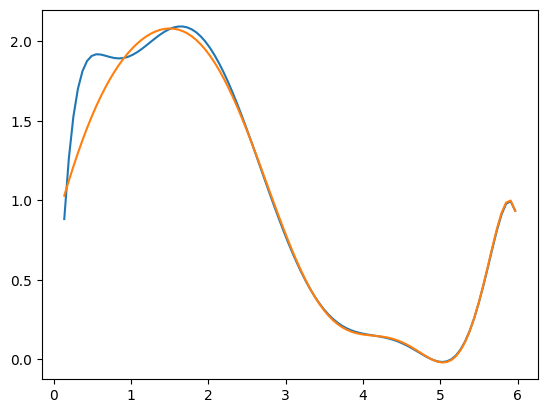

In [14]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)
y_linspace_linear = model_linear.predict(generate_degrees(x_linspace, degree))
y_linspace_ridge = model_ridge.predict(generate_degrees(x_linspace, degree))

plt.plot(x_linspace, y_linspace_linear)
plt.plot(x_linspace, y_linspace_ridge)


plt.show()

Готово, модели обучены! Мы видим тревожное сообщение **LinAlgWarning: Ill-conditioned matrix (rcond=2.23568e-22): result may not be accurate.** - тут ничего страшного, побороть это сообщение нам поможет знакомство с методом градиентного спуска в следующем уроке этого модуля.

Мы видим, что регуляризованная модель более "гладкая", а вот у модели без регуляризации есть перегибы - она выглядит переобученной. Давайте проверим норму коэффициентов регрессии.

In [15]:
print("Норма вектора весов Ridge \t||w|| = %.2f" % (norm(model_ridge.coef_)))
print("Норма вектора весов Linear \t||w|| = %.2f" % (norm(model_linear.coef_)))

Норма вектора весов Ridge 	||w|| = 1.94
Норма вектора весов Linear 	||w|| = 72.71


Мы видим, что регуляризованная модель - более сглаженная, чем нерегуляризованная. Регуляризация позволяет бороться с излишней сложностью модели за счёт наложения дополнительных ограничений на вектор весов модели.

Тем не менее, линия имеет причудливую форму - то есть мы получили довольно гибкую модель. При этом норма вектора коэффициентов линейной регрессии стала небольшой - наша модель не переобучилась.

Как видно, два разных (по норме) набора коэффициентов мы получили при двух разных значениях $\alpha$. Как же выбрать правильное значение коэффициента регуляризации? На помощь приходит процедура, которая называется отложенный контроль, как делали в первом уроке.

Реализуем эту процедуру на языке python. Для у нас есть готовая функция `sklearn.model_selection.train_test_split` :

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(40, 10) (10, 10)


In [36]:
alphas = [0.1, 0.15, 0.35 ,0.5,0.8]

best_alpha = alphas[0]
best_rmse = np.infty

for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    # обучаем линейную регрессию с  регуляризацией
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    if error < best_rmse:
        best_rmse = error
        best_alpha = alpha
    print("alpha = %.2f Ошибка %.5f" % (alpha, error))
print('\n-------\nЛучшая модель aplpha=%.2f с ошибкой RMSE=%.5f\n-------' % (best_alpha, best_rmse))

alpha = 0.10 Ошибка 0.04262
alpha = 0.15 Ошибка 0.04230
alpha = 0.35 Ошибка 0.04253
alpha = 0.50 Ошибка 0.04295
alpha = 0.80 Ошибка 0.04369

-------
Лучшая модель aplpha=0.15 с ошибкой RMSE=0.04230
-------


/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.01107e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.16361e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.74011e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.85494e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mikhail/anaconda3/lib/pyt

В этом уроке мы научились делать наши модели намного стабильнее - теперь веса линейной регрессии не увеличиваются с ростом степени полинома, а остаются заключёнными в допустимых пределах. Мы научились уменьшать переобучение с помощью регуляризации модели.

Однако, мы столкнулись с ворненгом **LinAlgWarning** что это за ошибка? Почему она возникает? Как её побороть? Об этом мы поговорим в следующем уроке.